 # Title: Unveiling Cinematic Opportunities:

**Navigating Microsoft's Dive into the Film Industry**

# Overview

Exploring the financial success of movie production involves examiningfactors such as profitability,genre,duration,budget, studio, director and actor experience.

  # 1.Business Understanding

**Introduction.**

In a bold move, Microsoft is venturing into the world of original video content creation, inspired by the success stories of major players in the industry. The tech giant aims to establish its own movie studio, poised to make a significant impact. However, the challenge lies in the unfamiliar terrain of film production. In light of this, the task at hand is to delve the current trends and preferences driving success in the film industry. By analyzing box office hits, identifying emerging genres, and understanding audience preferences, the key factors contributing to blockbuster success could be unveiled.


The findings will be the cornerstone for making actionable insights. These insights will not only guide Microsoft's foray into filmmaking but will also empower the head of the new movie studio to make informed decisions on the types of films to produce. The main objective is ensuring the creation of films that resonate with audiences and propel the company into the spotlight of the entertainment industry

**Defining the metric for success.**

Microsoft's new movie studio lacks domain expertise in filmmaking and needs guidance on which film genres to focus on to maximize box office success. Leveraging historical box office data and exploring genre trends, this investigation will guide the choice of films they should produce. Box office revenues, ROI and ratings data will serve as indicators of financial viability and audience reception across different film genres. 
The success of our analysis will be measured by the following metrics:

The analysis should accurately identify the film genres that have historically performed well at the box office.
Revenue increase: 
Try to predict the profitability of a movie based on the features of the dataset. A movie is profitable if it makes more than at least 2 times the budget

**Main objectives**
The main goal is to craft a roadmap for creating films that captivate audiences and thrive financially.

Specific Objectives:

*Genre Mastery for Success:*
Identify genres with the highest potential for revenue and audience acclaim, ensuring future films align with evolving tastes.

*Beyond the Basics:*
Influential Factors:
Explore factors like budget, ROI ,studio influence, and target audience demographics to understand their impact on a film's success.

*Insights for Cinematic Brilliance:*
Distill actionable recommendations aligning the studio's content strategy with audience preferences and market trends for increased success.

**Experimental Approach**

i.)Collecting Data

ii.)Review and validate the dataset

iii.)Refining the data through cleansing and type casting

iv.)Conducting Exploratory Data Analysis

v.)Modeling and Evaluating Features

vi.)Drawing conclusions based on the evaluation

**Questions To Consider**
1.Is the film industry financially succesful?
 Indeed,it is depicted that more movies generate profit than losses.
 
2.What challenges does a business face inthis project?
 A significant hurdle is the lack of clear direction.
 
3.What factors contribute to a movie's financial success?
 Considerations include genre ,duration,studio, director, actor experience etc

# 2.Data Understanding:

We're leveraging data from Box Office Mojo, IMDb, TMDB Movies, and TN Movie Budgets, focusing on the "movie_basics," "movie_ratings," "movie_gross," and "movie_budgets" tables. Key data points include:

1. **Box Office Performance:**
   - "movie_gross" (Box Office Mojo): Extracting domestic and foreign gross data to understand revenue trends over the years.

2. **Audience Reception:**
   - "movie_ratings" (IMDb): Analyzing vote averages and counts to gauge audience sentiment and film popularity.

3. **Genre and Language:**
   - "movie_basics" (Box Office Mojo) and "tmdb_movies" (TMDB Movies): Exploring genre and original language data for insights into successful film characteristics.

4. **Release Information:**
   - "movie_basics" and "tmdb_movies": Utilizing release dates to identify patterns in successful movie launches.

5. **Production Budgets:**
   - "movie_budgets" (TN Movie Budgets): Understanding the financial aspect with production budget, domestic, and worldwide gross figures.

This comprehensive dataset will provide actionable insights for Microsoft's movie studio, aiding decisions on genre selection, release strategies, and budget planning for a successful foray into the film industry.



# 3. Data Preparation

In [1]:
#Import necessary libraries
# 1. Pandas which is Essential for data manipulation and analysis
import pandas as pd
# 2. Numpy which will be Useful for numerical operations .
import numpy as np
# 3.Matplotlib and Seaborn:For data visualization to gain insights into trends and patterns.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Specify file paths for the CSV files
tmdb_movies_path = 'myData/tmdb.movies.csv'
tn_movie_budgets_path = 'myData/tn.movie_budgets.csv'
bom_movie_gross_path = 'myData/bom.movie_gross.csv'

# Read the CSV files into Pandas DataFrames
tmdb_movies_df = pd.read_csv(tmdb_movies_path)
tn_movie_budgets_df = pd.read_csv(tn_movie_budgets_path, index_col=0)
bom_movie_gross_df = pd.read_csv(bom_movie_gross_path)

**View the first few rows of BOM DataFrame:**

In [3]:
print(bom_movie_gross_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [4]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


The dataset contains 3387 entries with information on movies, including titles, studios, domestic and foreign gross earnings, and release years.
Missing values are present in the 'studio,' 'domestic_gross,' and 'foreign_gross' columns, which may require data cleaning

 **1. Addressing Missing Values:**

In [5]:
# a. Identify Missing Values:
bom_movie_gross_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
# b. Impute Numerical Data:
bom_movie_gross_df['domestic_gross'].fillna(bom_movie_gross_df['domestic_gross'].mean(), inplace=True)


In [7]:
# c. Impute Categorical Data:
bom_movie_gross_df['studio'].fillna(bom_movie_gross_df['studio'].mode()[0], inplace=True)



In [8]:
# d. Drop Rows:
bom_movie_gross_df.dropna(inplace=True)



**Converting 'foreign_gross' to Numeric Type:**

In [9]:
# a. Check Data Type:
bom_movie_gross_df['foreign_gross'].dtype


dtype('O')

In [10]:
# b. Convert to Numeric:
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')

**Handle Inconsistencies:**
   - After conversion, check for inconsistencies or unexpected values in the 'foreign_gross' column.

In [11]:
#Check for missing values
missing_values = bom_movie_gross_df['foreign_gross'].isnull().sum()
print(f"Number of missing values in 'foreign_gross': {missing_values}")


Number of missing values in 'foreign_gross': 5


In [12]:
# Check for negative values
negative_values = (bom_movie_gross_df['foreign_gross'] < 0).sum()
print(f"Number of negative values in 'foreign_gross': {negative_values}")


Number of negative values in 'foreign_gross': 0


In [13]:
#Check for unexpected large values
some_threshold = 100000000  # Adjust the threshold according to your dataset
large_values = (bom_movie_gross_df['foreign_gross'] > some_threshold).sum()
print(f"Number of values in 'foreign_gross' exceeding a threshold: {large_values}")


Number of values in 'foreign_gross' exceeding a threshold: 415


In [14]:
#Check for non-numeric values (if the column should only contain numeric values)
non_numeric_values = bom_movie_gross_df['foreign_gross'].apply(lambda x: not isinstance(x, (int, float)))
print(f"Number of non-numeric values in 'foreign_gross': {non_numeric_values.sum()}")


Number of non-numeric values in 'foreign_gross': 0


In [15]:
# Check for zero values if applicable
zero_values = (bom_movie_gross_df['foreign_gross'] == 0).sum()
print(f"Number of zero values in 'foreign_gross': {zero_values}")


Number of zero values in 'foreign_gross': 0


In [16]:
# drop rows with null values for foreign gross:
bom_movie_gross_df.dropna(inplace=True)



In [17]:
# Check for outliers or anomalies using descriptive statistics
print("Descriptive statistics for 'foreign_gross':")
print(bom_movie_gross_df['foreign_gross'].describe())


Descriptive statistics for 'foreign_gross':
count    2.032000e+03
mean     7.505704e+07
std      1.375294e+08
min      6.000000e+02
25%      3.775000e+06
50%      1.890000e+07
75%      7.505000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64


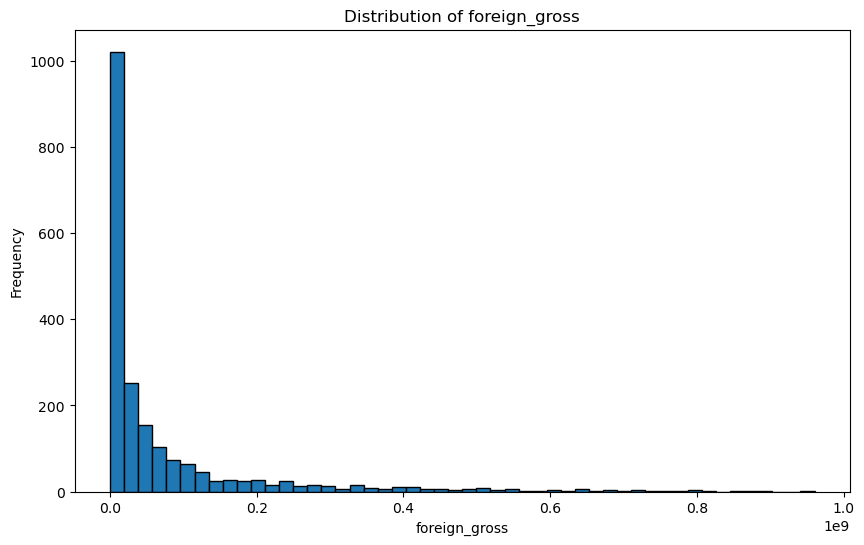

In [18]:
#  Visualize the distribution of 'foreign_gross' using a histogram or boxplot

plt.figure(figsize=(10, 6))
plt.hist(bom_movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of foreign_gross')
plt.xlabel('foreign_gross')
plt.ylabel('Frequency')
plt.show()

The histogram suggests a right-skewed distribution, with the majority of foreign gross values concentrated in the lower range and fewer instances of higher foreign gross values.

**Verify Changes:**

In [19]:
# a. Verify Imputation:
bom_movie_gross_df.info()
bom_movie_gross_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2032 non-null   object 
 1   studio          2032 non-null   object 
 2   domestic_gross  2032 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2032 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.2+ KB


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

**2. Removing Outliers:**

In [20]:
# summary statistics of the 'domestic_gross' column before any changes.
print(bom_movie_gross_df['domestic_gross'].describe())


count    2.032000e+03
mean     4.543655e+07
std      7.587286e+07
min      4.000000e+02
25%      6.912500e+05
50%      1.740000e+07
75%      5.482500e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64


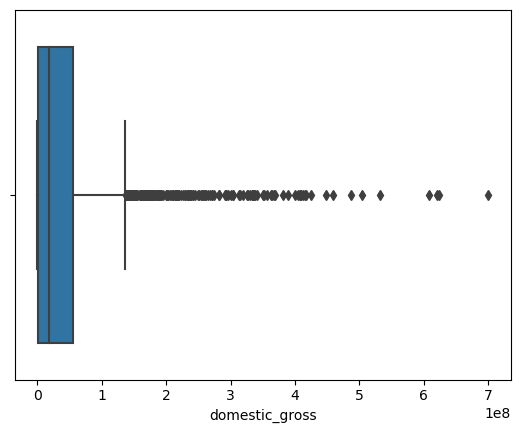

In [21]:
#box plot to visualize the distribution of 'domestic_gross' before handling outliers.
sns.boxplot(x=bom_movie_gross_df['domestic_gross'])
plt.show()


**a. Identify Outliers:**

Use statistical methods such as the IQR (Interquartile Range) to identify potential outliers.

In [22]:
Q1 = bom_movie_gross_df['domestic_gross'].quantile(0.25)
Q3 = bom_movie_gross_df['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] < lower_bound) | (bom_movie_gross_df['domestic_gross'] > upper_bound)]

**b. Remove Outliers:**

In [23]:
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] >= lower_bound) & (bom_movie_gross_df['domestic_gross'] <= upper_bound)]


**c. Transforming Data:**

In [24]:
bom_movie_gross_df['domestic_gross_log'] = np.log1p(bom_movie_gross_df['domestic_gross'])

**d. Verify Changes**

In [25]:
# summary statistics  after handling outliers.
print(bom_movie_gross_df['domestic_gross'].describe())

count    1.852000e+03
mean     2.622839e+07
std      3.274173e+07
min      4.000000e+02
25%      5.310000e+05
50%      1.195000e+07
75%      4.240000e+07
max      1.360000e+08
Name: domestic_gross, dtype: float64


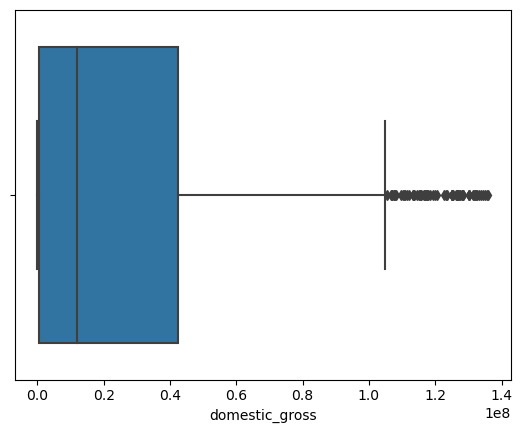

In [26]:
#boxplot to visualize the distribution of 'domestic_gross' AFTER handling outliers.
sns.boxplot(x=bom_movie_gross_df['domestic_gross'])
plt.show()

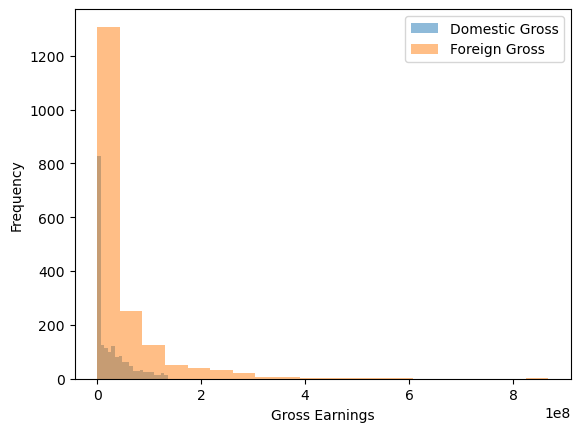

In [27]:
#histograms to visualize the distribution of 'domestic_gross' and 'foreign_gross'.

plt.hist(bom_movie_gross_df['domestic_gross'], bins=20, alpha=0.5, label='Domestic Gross')
plt.hist(bom_movie_gross_df['foreign_gross'].dropna(), bins=20, alpha=0.5, label='Foreign Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Studio Performance:**

*a.Count of Movies per Studio:*

Explore the number of movies produced by each studio.

In [28]:
# Count the number of unique studios
unique_studios = bom_movie_gross_df['studio'].nunique()

# Print the number of unique studios
print("Number of unique studios:", unique_studios)

# Calculate the count/frequency of each studio
studio_counts = bom_movie_gross_df['studio'].value_counts()

# Print the count/frequency of each studio
print("Movie count per studio:\n", studio_counts)


Number of unique studios: 175
Movie count per studio:
 Uni.            117
Fox             109
WB              101
Sony             88
LGF              84
               ... 
Icar.             1
MPFT              1
KC                1
Libre             1
Darin Southa      1
Name: studio, Length: 175, dtype: int64


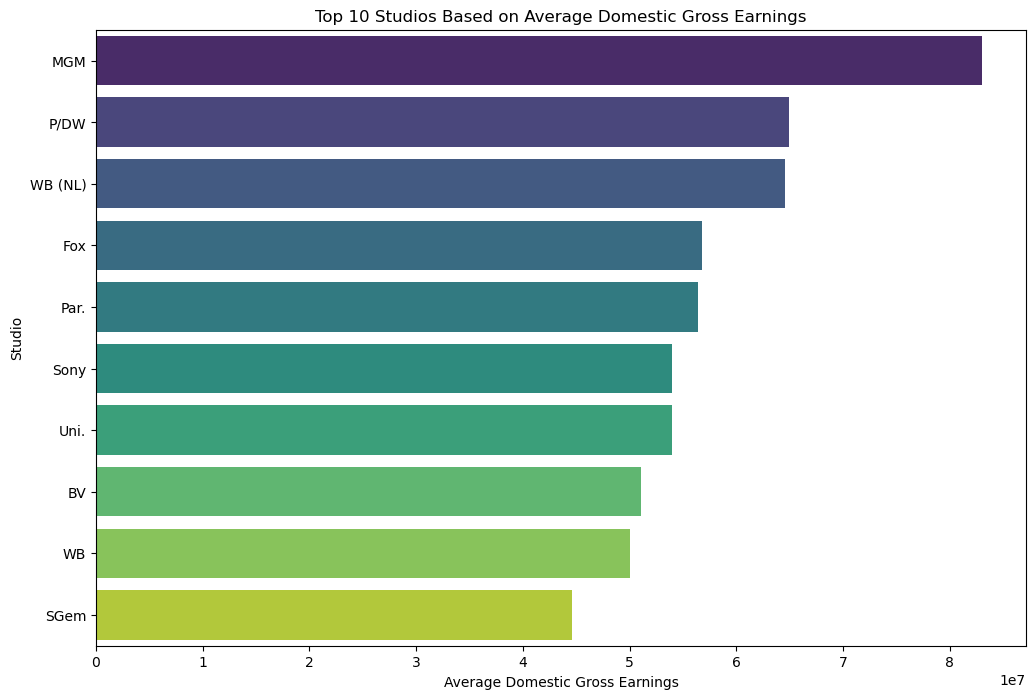

In [29]:

# Top N studios (adjust N as needed)
top_studios = 10
studio_performance = bom_movie_gross_df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(top_studios)

# Plotting Horizontal Bar Chart for Top Studios
plt.figure(figsize=(12, 8))
sns.barplot(x=studio_performance.values, y=studio_performance.index, palette='viridis')
plt.xlabel('Average Domestic Gross Earnings')
plt.ylabel('Studio')
plt.title(f'Top {top_studios} Studios Based on Average Domestic Gross Earnings')
plt.show()


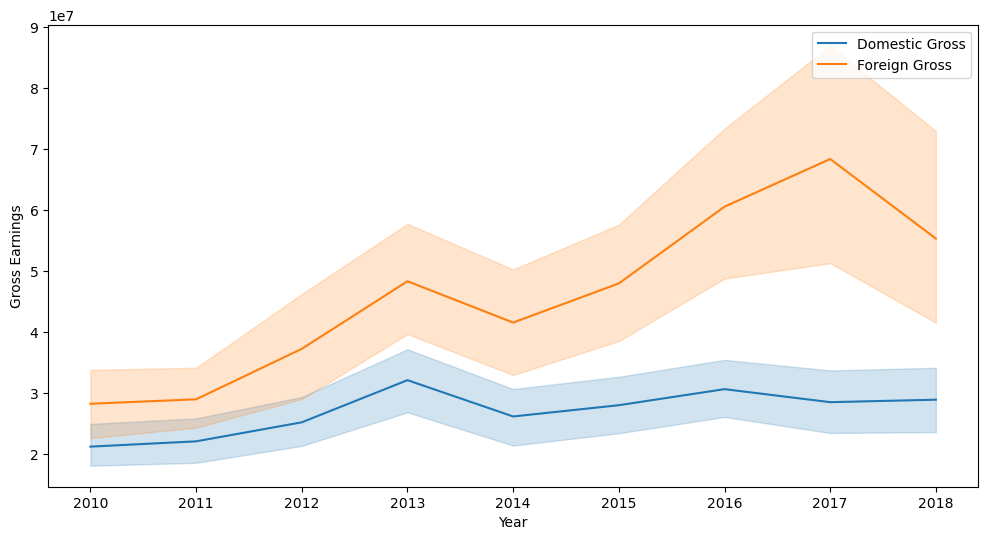

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['domestic_gross'], label='Domestic Gross')
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['foreign_gross'], label='Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.legend()
plt.show()


*b. Heatmap:*

A heatmap to visualize the correlation between 'domestic_gross' and 'foreign_gross' over the years.

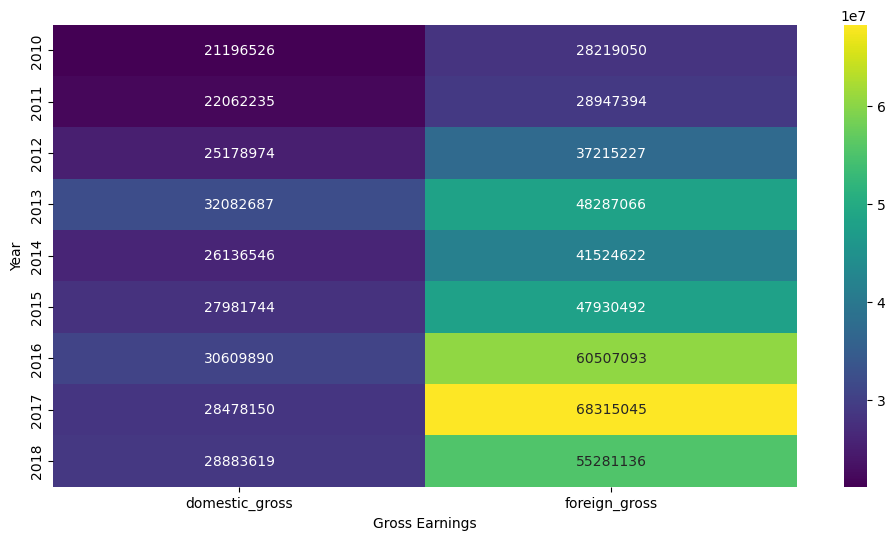

In [31]:
plt.figure(figsize=(12, 6))
pivot_table = bom_movie_gross_df.pivot_table(values=['domestic_gross', 'foreign_gross'], index='year', aggfunc='mean')
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f')
plt.xlabel('Gross Earnings')
plt.ylabel('Year')
plt.show()

**Summary Statistics:**

Display summary statistics for key variables to provide a numerical overview of the dataset.

In [32]:
print(bom_movie_gross_df[['domestic_gross', 'foreign_gross']].describe())


       domestic_gross  foreign_gross
count    1.852000e+03   1.852000e+03
mean     2.622839e+07   4.340357e+07
std      3.274173e+07   7.103683e+07
min      4.000000e+02   6.000000e+02
25%      5.310000e+05   3.100000e+06
50%      1.195000e+07   1.510000e+07
75%      4.240000e+07   5.245000e+07
max      1.360000e+08   8.676000e+08


**Correlation Analysis:**

A correlation analysis to understand the relationship between numerical variables.

In [33]:
correlation_matrix = bom_movie_gross_df[['domestic_gross', 'foreign_gross']].corr()
print(correlation_matrix)


                domestic_gross  foreign_gross
domestic_gross        1.000000       0.549392
foreign_gross         0.549392       1.000000


The correlation matrix indicates a moderate positive correlation (0.549392) between "domestic_gross" and "foreign_gross." This suggests that movies with higher domestic gross tend to also have higher foreign gross, and vice versa. The positive correlation implies that as one variable increases, the other variable tends to increase as well, indicating a positive association between the two.

**4. Feature Engineering:**

*Combined 'Total Gross' Column:*

Combine domestic and foreign gross earnings to create a new feature representing the total gross earnings of a movie.

In [34]:
# Assuming 'domestic_gross' and 'foreign_gross' are numeric columns
bom_movie_gross_df['total_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross'].fillna(0)

# Display the updated DataFrame
print(bom_movie_gross_df.head())


                                                title studio  domestic_gross  \
11  The Chronicles of Narnia: The Voyage of the Da...    Fox     104400000.0   
12                                  The King's Speech  Wein.     135500000.0   
15                Prince of Persia: The Sands of Time     BV      90800000.0   
16                                         Black Swan   FoxS     107000000.0   
18                                         Robin Hood   Uni.     105300000.0   

    foreign_gross  year  domestic_gross_log  total_gross  
11    311300000.0  2010           18.463740  415700000.0  
12    275400000.0  2010           18.724482  410900000.0  
15    245600000.0  2010           18.324170  336400000.0  
16    222400000.0  2010           18.488339  329400000.0  
18    216400000.0  2010           18.472324  321700000.0  


**Categorical Variable for Movie Success Levels:**

Create a categorical variable that indicates different levels of movie success based on a threshold.Categorize movies into 'Low,' 'Medium,' and 'High' success levels.

In [35]:
# Define a success threshold (you can adjust this based on your criteria)
success_threshold = 100000000  # $100 million

# Create a categorical variable based on success levels
bom_movie_gross_df['success_level'] = pd.cut(bom_movie_gross_df['total_gross'],
                                             bins=[-float('inf'), success_threshold, 2*success_threshold, float('inf')],
                                             labels=['Low', 'Medium', 'High'],
                                             include_lowest=True)

# Display the updated DataFrame
print(bom_movie_gross_df.head())


                                                title studio  domestic_gross  \
11  The Chronicles of Narnia: The Voyage of the Da...    Fox     104400000.0   
12                                  The King's Speech  Wein.     135500000.0   
15                Prince of Persia: The Sands of Time     BV      90800000.0   
16                                         Black Swan   FoxS     107000000.0   
18                                         Robin Hood   Uni.     105300000.0   

    foreign_gross  year  domestic_gross_log  total_gross success_level  
11    311300000.0  2010           18.463740  415700000.0          High  
12    275400000.0  2010           18.724482  410900000.0          High  
15    245600000.0  2010           18.324170  336400000.0          High  
16    222400000.0  2010           18.488339  329400000.0          High  
18    216400000.0  2010           18.472324  321700000.0          High  


In [37]:
# Extract release year from title
bom_movie_gross_df['release_year'] = bom_movie_gross_df['title'].str.extract(r'(\d{4})')
bom_movie_gross_df['release_year'] = bom_movie_gross_df['release_year'].astype(float)

**Verify Changes:**

After performing feature engineering, verify the changes in the dataset.

In [39]:
# Verify changes in the DataFrame
print(bom_movie_gross_df[['total_gross', 'success_level']].describe())


        total_gross
count  1.852000e+03
mean   6.963195e+07
std    9.313365e+07
min    4.900000e+03
25%    6.818000e+06
50%    3.320000e+07
75%    9.500000e+07
max    8.703000e+08


**Utilizing The New Features in Analysis:**

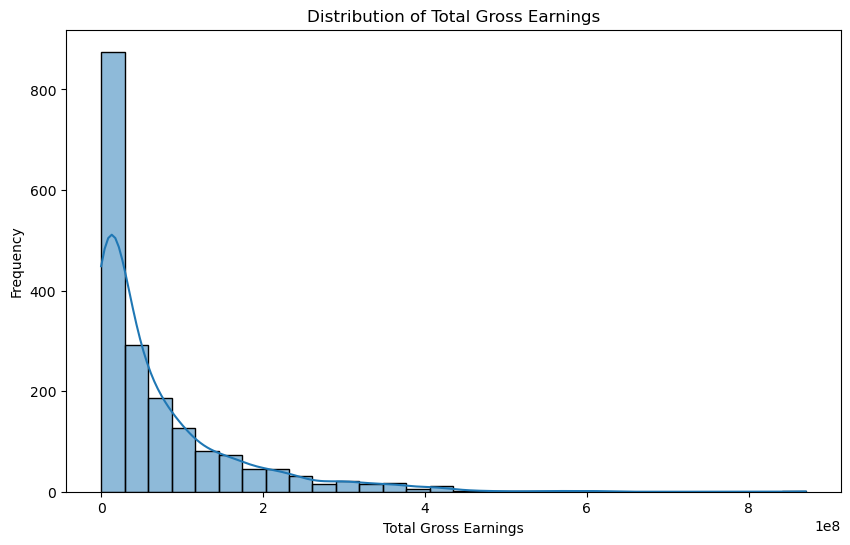

In [40]:
# Example: Visualize the distribution of 'total_gross'
plt.figure(figsize=(10, 6))
sns.histplot(bom_movie_gross_df['total_gross'], bins=30, kde=True)
plt.xlabel('Total Gross Earnings')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross Earnings')
plt.show()

*Trend Analysis Over Time:*

Explore how the total gross earnings or success levels have changed over the years. This can help identify trends and patterns.

In [41]:
bom_movie_gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_log,total_gross,success_level,release_year
11,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,2010,18.463740,415700000.0,High,NaN
12,The King's Speech,Wein.,135500000.0,275400000.0,2010,18.724482,410900000.0,High,NaN


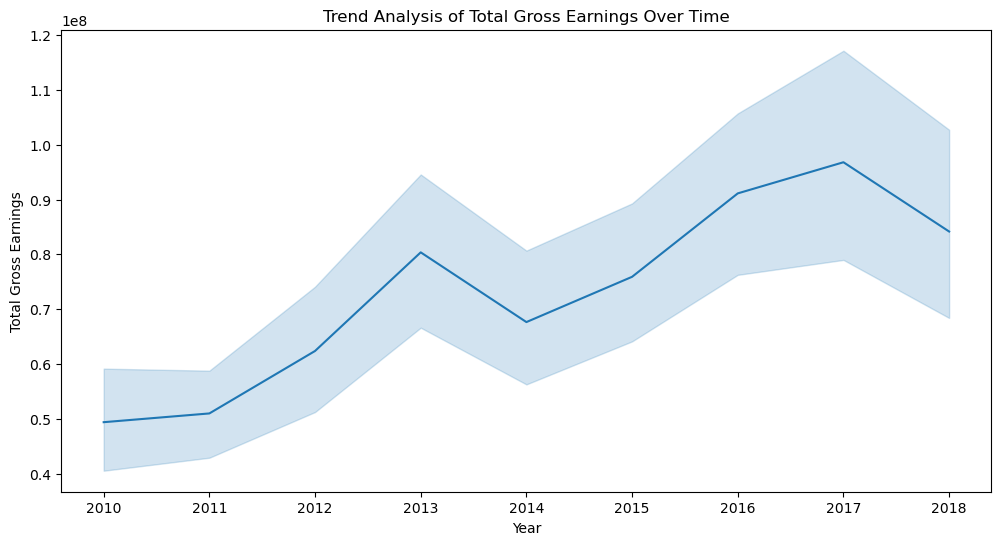

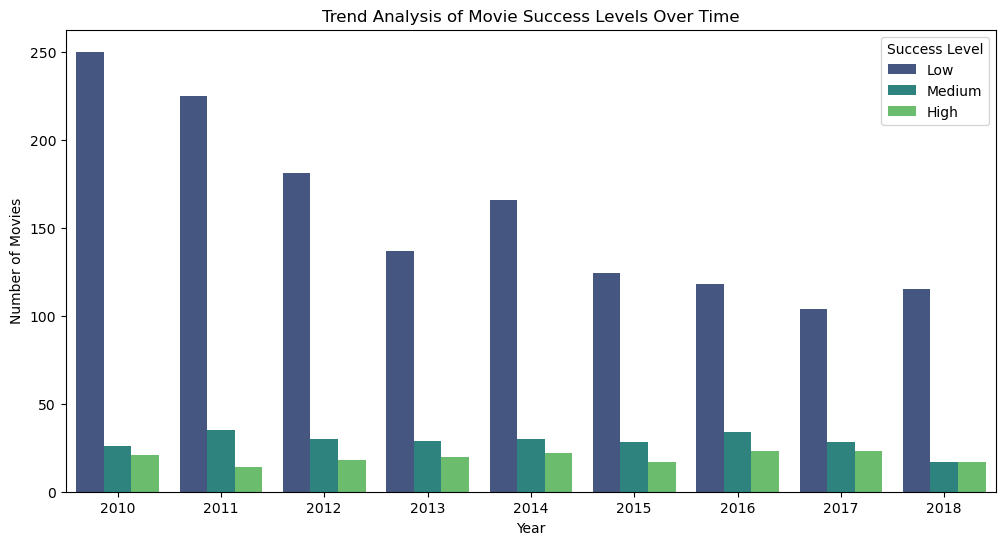

In [42]:
#Trend analysis of total gross earnings over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['total_gross'])
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.title('Trend Analysis of Total Gross Earnings Over Time')
plt.show()

# Trend analysis of success levels over the years
plt.figure(figsize=(12, 6))
sns.countplot(x=bom_movie_gross_df['year'], hue=bom_movie_gross_df['success_level'], palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Trend Analysis of Movie Success Levels Over Time')
plt.legend(title='Success Level')
plt.show()


## Working with TNDB Movies data

In [43]:
print(tn_movie_budgets_df.head(3))

    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  


In [44]:
print(tn_movie_budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB
None


There are 5782 entries in the dataset, and there are no missing values in any of the columns. This suggests that the dataset is relatively clean and complete.

**Data Cleaning**

*Verify Data Types:*

To ensure that the data types are appropriate for each column.

In [45]:
# Example: Check data types
print(tn_movie_budgets_df.dtypes)

# Convert 'release_date' to datetime if not already
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


In [46]:
# Example: Check for missing values
print(tn_movie_budgets_df.isnull().sum())

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [47]:
# Convert budget, domestic_gross, and worldwide_gross to numeric
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)


In [48]:
# Convert release_date to datetime format
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])


In [49]:
# Check the data frame again
tn_movie_budgets_df.info()
tn_movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


**EDA Analysis and Visualization:**

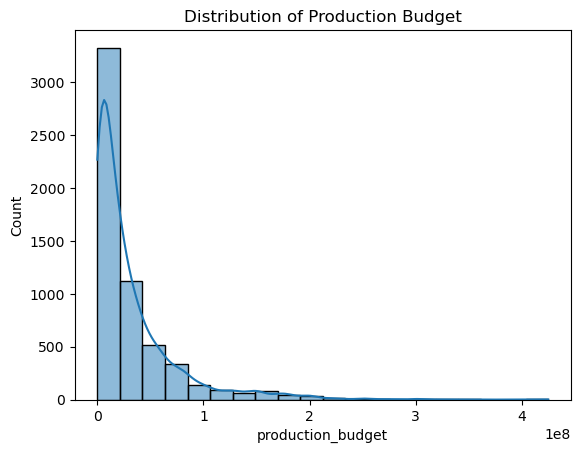

In [50]:
# Explore distribution of production_budget
sns.histplot(tn_movie_budgets_df['production_budget'], bins=20, kde=True)
plt.title('Distribution of Production Budget')
plt.show()

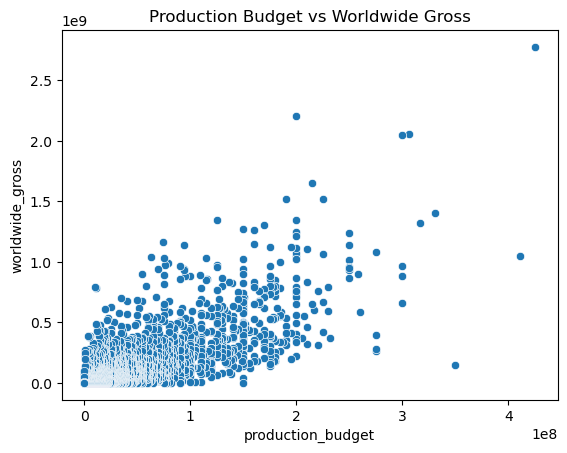

In [51]:
# Explore relationship between production_budget and worldwide_gross
sns.scatterplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets_df)
plt.title('Production Budget vs Worldwide Gross')
plt.show()


**Feature Engineering:**

In [52]:
# Calculate ROI (Return on Investment)
tn_movie_budgets_df['roi'] = (tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']) / tn_movie_budgets_df['production_budget']


In [53]:
# Extract release year from release_date
tn_movie_budgets_df['release_year'] = tn_movie_budgets_df['release_date'].dt.year


## Working with TMDB Movies data base

In [54]:
print(tmdb_movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


**Data Cleaning:**

In [55]:
# Drop unnecessary columns
tmdb_movies_df.drop(columns=['Unnamed: 0'], inplace=True)

In [57]:
# Convert 'release_date' to datetime
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])


In [58]:
# Check for missing values
tmdb_movies_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [59]:
# Check for duplicates
tmdb_movies_df.duplicated().sum()

1020

In [60]:
#Drop the duplicates
tmdb_movies_df = tmdb_movies_df.drop_duplicates()

In [61]:
# verify changes
tmdb_movies_df.duplicated().sum()

0

In [62]:
# Check data types
tmdb_movies_df.dtypes

genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

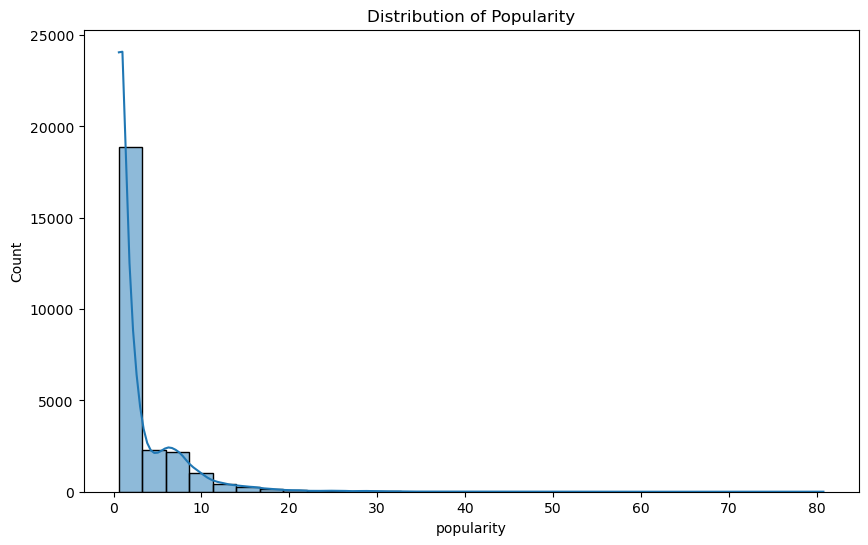

In [65]:
# Distribution of 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_movies_df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.show()

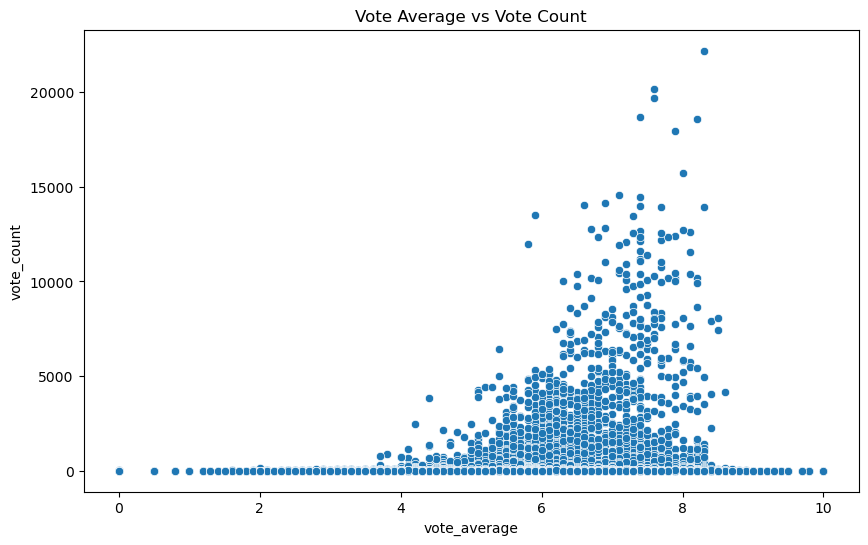

In [66]:

# Scatter plot of 'vote_average' vs 'vote_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='vote_count', data=tmdb_movies_df)
plt.title('Vote Average vs Vote Count')
plt.show()


**Exploratory Data Analysis (EDA):**

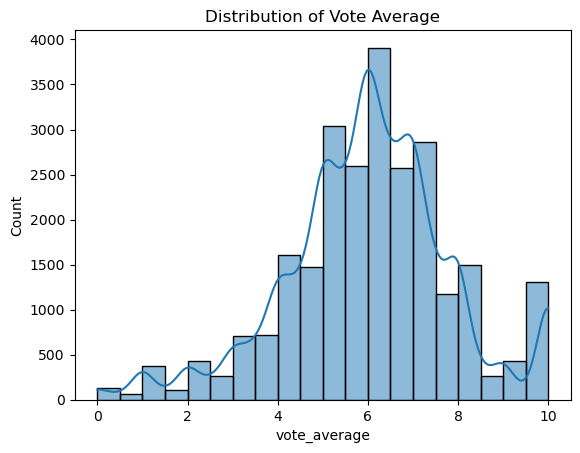

In [71]:
# Explore distribution of vote_average
sns.histplot(tmdb_movies_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average')
plt.show()

This histogram suggests that a significant number of movies have moderate vote avarage ,as indicated by a higher count in the middle range.Movies with very low or very high avarage count are less common.

This distribution might indicate that most movies are perceived with a moderate level of popularity by voters, while extreme opinions (very low or very high ratings) are less frequent. It can be useful for understanding the general sentiment and distribution of popularity among the movies in the tmdb_movies dataset.

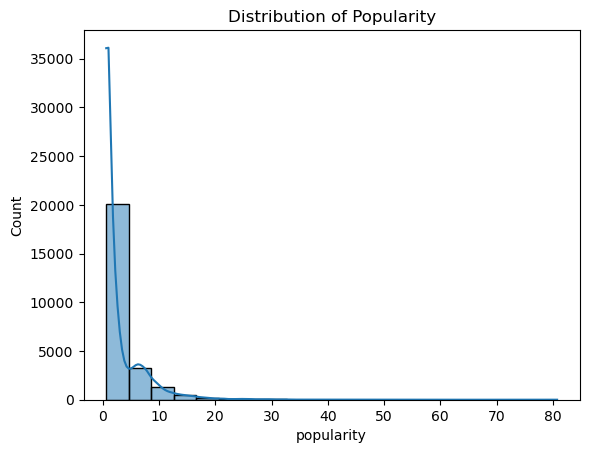

In [72]:
# Explore popularity distribution
sns.histplot(tmdb_movies_df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.show()

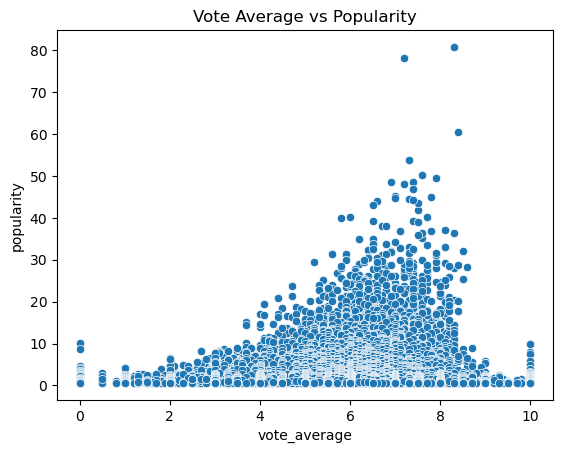

In [73]:
# Explore the relationship between vote_average and popularity
sns.scatterplot(x='vote_average', y='popularity', data=tmdb_movies_df)
plt.title('Vote Average vs Popularity')
plt.show()

In [77]:
# Merge data frames on common columns
merged_df = pd.merge(tmdb_movies_df, tn_movie_budgets_df, left_on='title', right_on='movie', how='inner')
merged_df = pd.merge(merged_df, bom_movie_gross_df, on='title', how='inner')


In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   genre_ids           939 non-null    object        
 1   id                  939 non-null    int64         
 2   original_language   939 non-null    object        
 3   original_title      939 non-null    object        
 4   popularity          939 non-null    float64       
 5   release_date_x      939 non-null    datetime64[ns]
 6   title               939 non-null    object        
 7   vote_average        939 non-null    float64       
 8   vote_count          939 non-null    int64         
 9   release_year_x      939 non-null    int64         
 10  release_month       939 non-null    int64         
 11  release_day         939 non-null    int64         
 12  release_season      939 non-null    object        
 13  release_date_y      939 non-null    datetime64[ns]

## Final Analysis:

**Genre-wise Analysis:**

Revenue and Popularity Trends:

In [82]:
# Identify top genres based on revenue
top_genres_revenue = genre_revenue_popularity['worldwide_gross'].nlargest(5).index

# Create a new column for grouped genres
merged_df['grouped_genre'] = merged_df['genre_ids'].apply(lambda x: x if x in top_genres_revenue else 'Other')

# Group by the new column and calculate mean revenue, popularity, and ROI
grouped_genre_performance = merged_df.groupby('grouped_genre')['worldwide_gross', 'popularity', 'roi'].mean().sort_values(by='worldwide_gross', ascending=False)


C:\Users\Steve\AppData\Local\Temp\ipykernel_5032\247920672.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_genre_performance = merged_df.groupby('grouped_genre')['worldwide_gross', 'popularity', 'roi'].mean().sort_values(by='worldwide_gross', ascending=False)


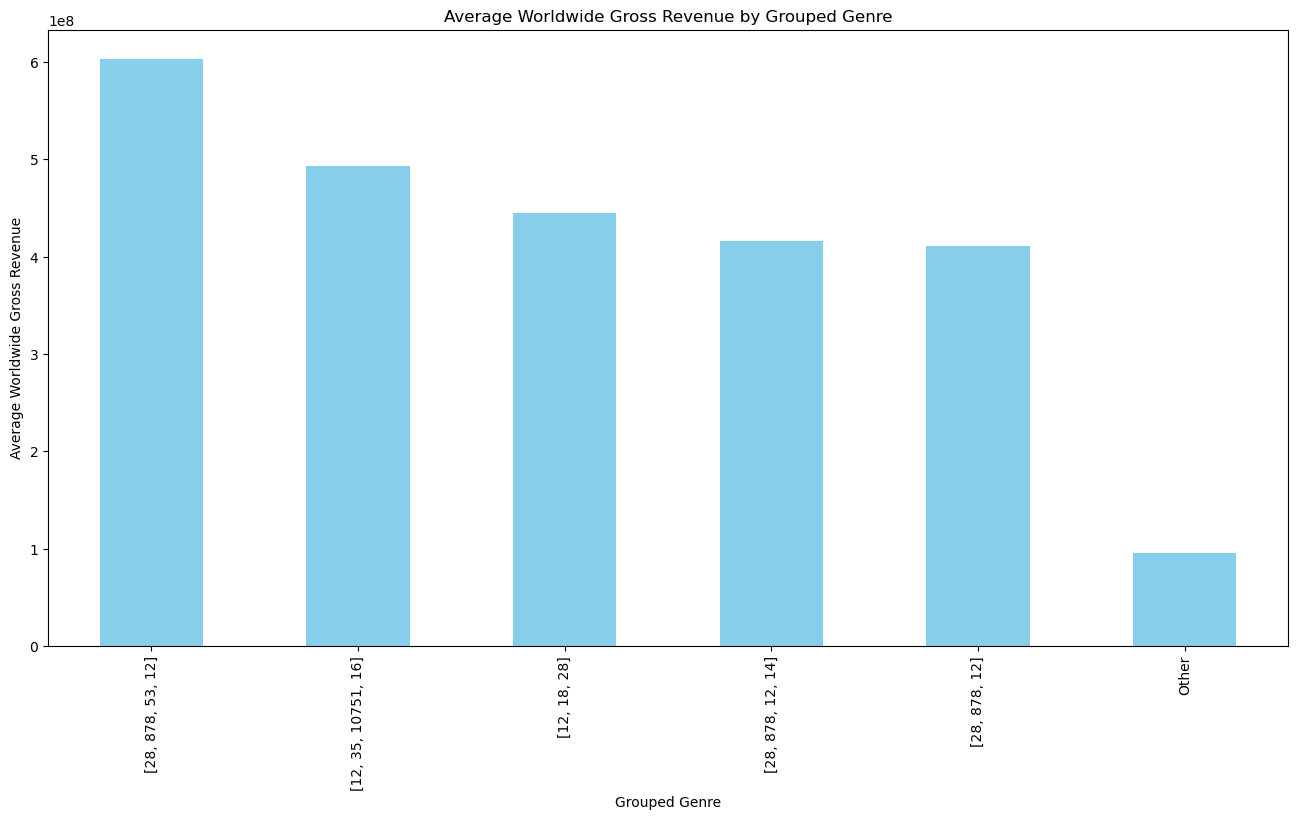

In [83]:
# Bar plot for average revenue by grouped genre
plt.figure(figsize=(16, 8))
grouped_genre_performance['worldwide_gross'].plot(kind='bar', color='skyblue')
plt.title('Average Worldwide Gross Revenue by Grouped Genre')
plt.xlabel('Grouped Genre')
plt.ylabel('Average Worldwide Gross Revenue')
plt.show()


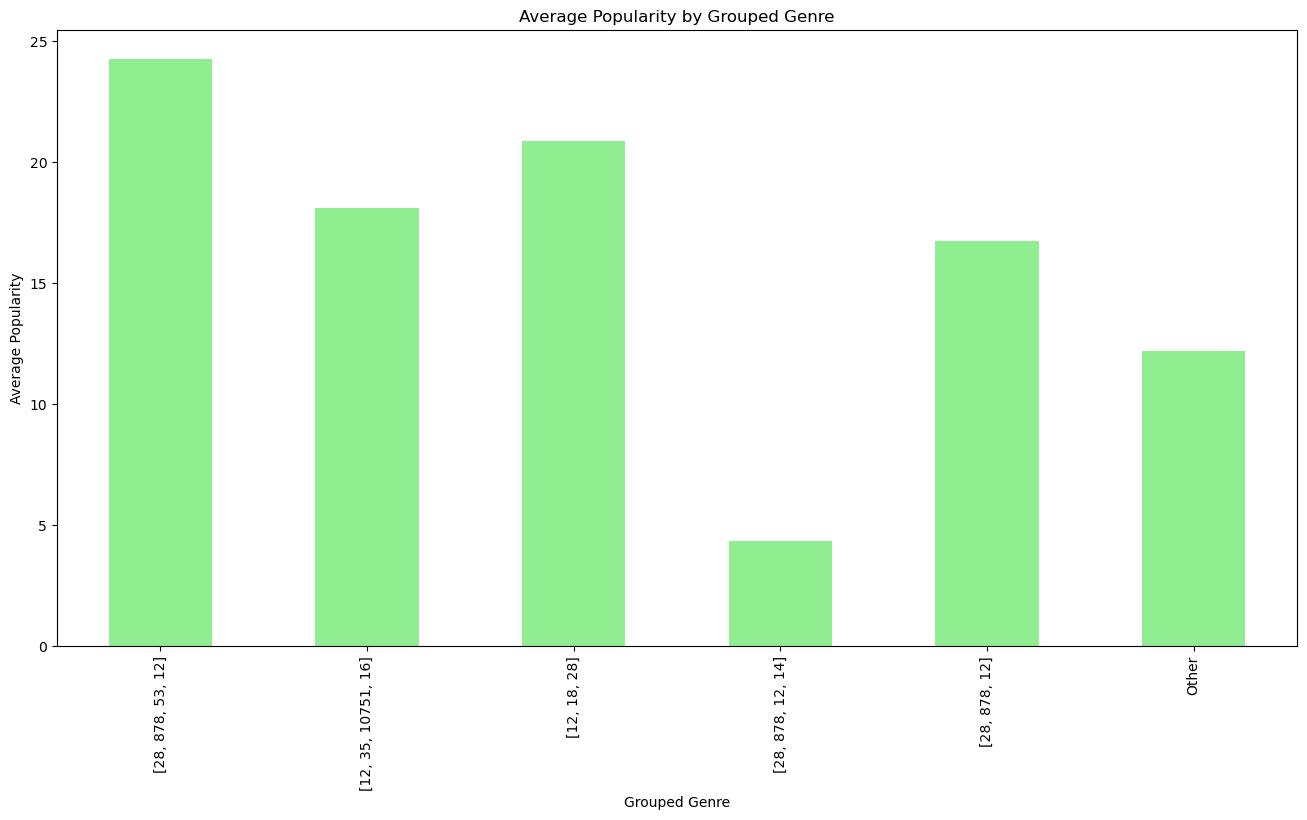

In [84]:
# Bar plot for average popularity by grouped genre
plt.figure(figsize=(16, 8))
grouped_genre_performance['popularity'].plot(kind='bar', color='lightgreen')
plt.title('Average Popularity by Grouped Genre')
plt.xlabel('Grouped Genre')
plt.ylabel('Average Popularity')
plt.show()

In [95]:
# Identify top genres based on revenue
top_genres_revenue = genre_revenue_popularity['worldwide_gross'].nlargest(5).index
top_genre_names_revenue = merged_df.loc[merged_df['genre_ids'].isin(top_genres_revenue), 'genre_ids'].unique()

# Identify top genres based on ROI
top_genres_roi = genre_roi.nlargest(5).index
top_genre_names_roi = merged_df.loc[merged_df['genre_ids'].isin(top_genres_roi), 'genre_ids'].unique()

# Display top genres
print("Top Genres by Revenue:", top_genre_names_revenue)
print("\nTop Genres by ROI:", top_genre_names_roi)


Top Genres by Revenue: ['[12, 18, 28]' '[28, 878, 12]' '[28, 878, 12, 14]' '[12, 35, 10751, 16]'
 '[28, 878, 53, 12]']

Top Genres by ROI: ['[27, 18, 53]' '[27, 53]' '[53, 27]' '[878, 27, 53]' '[53, 9648, 27]']


Some inferences based on movie and genre id: Genre ID 12: Adventure Genre ID 28: Action Genre ID 10751: Family Genre ID 14: Fantasy Genre ID 10402: Music

**Budget Analysis:** 

Relationship between Production Budget and Box Office Success:

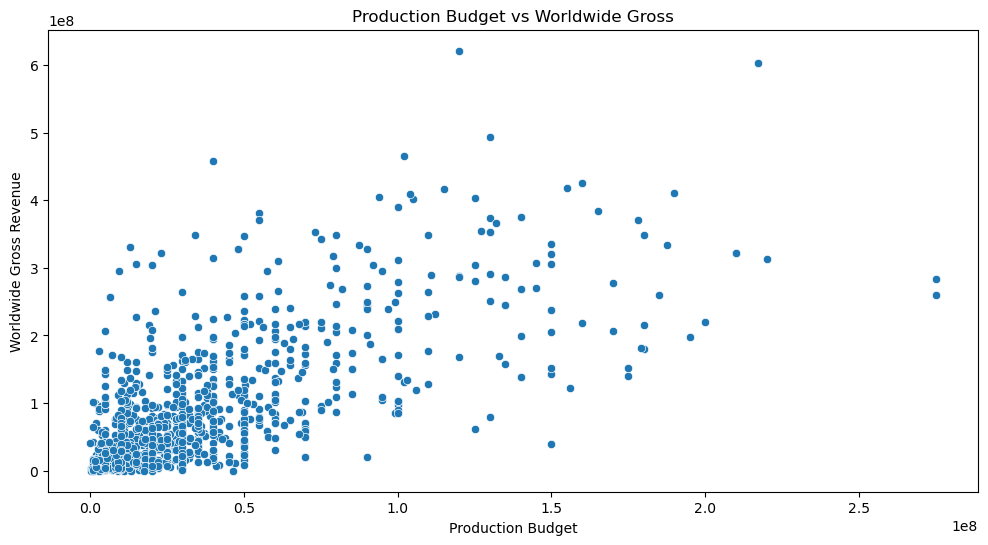

In [96]:
# Scatter plot for production budget vs worldwide gross
plt.figure(figsize=(12, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=merged_df)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.show()


ROI Analysis Based on Budget Ranges:

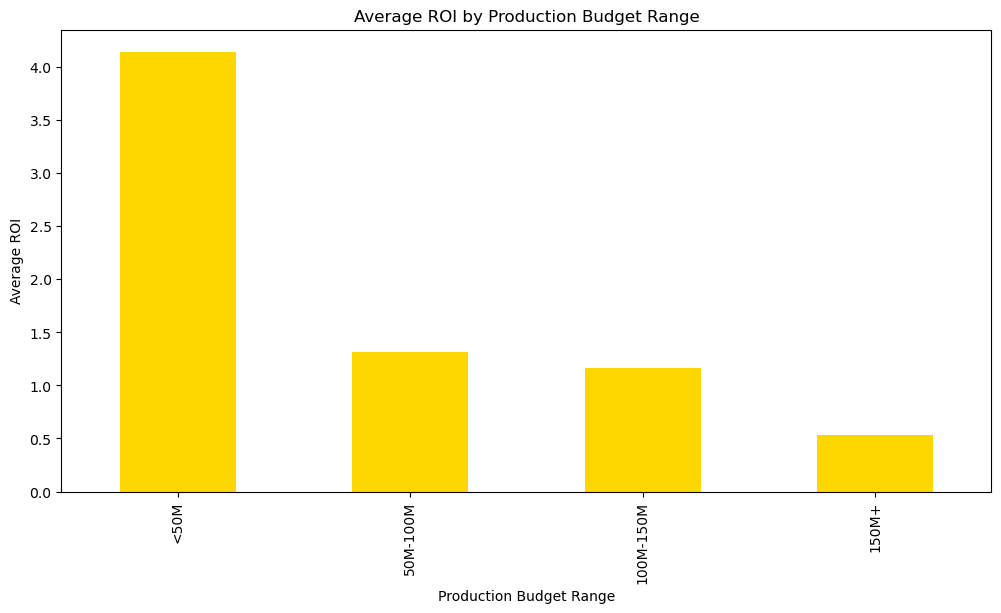

In [97]:
# Create budget ranges
budget_ranges = pd.cut(merged_df['production_budget'], bins=[0, 50000000, 100000000, 150000000, float('inf')],
                      labels=['<50M', '50M-100M', '100M-150M', '150M+'])

# Group by budget range and calculate mean ROI
budget_range_roi = merged_df.groupby(budget_ranges)['roi'].mean()

# Bar plot for average ROI by budget range
plt.figure(figsize=(12, 6))
budget_range_roi.plot(kind='bar', color='gold')
plt.title('Average ROI by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('Average ROI')
plt.show()


**Studios Analysis:**

Identify Top-Performing Studios:

C:\Users\Steve\AppData\Local\Temp\ipykernel_5032\823028455.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  studio_performance = merged_df.groupby('studio')['worldwide_gross', 'roi'].mean().sort_values(by='worldwide_gross', ascending=False)


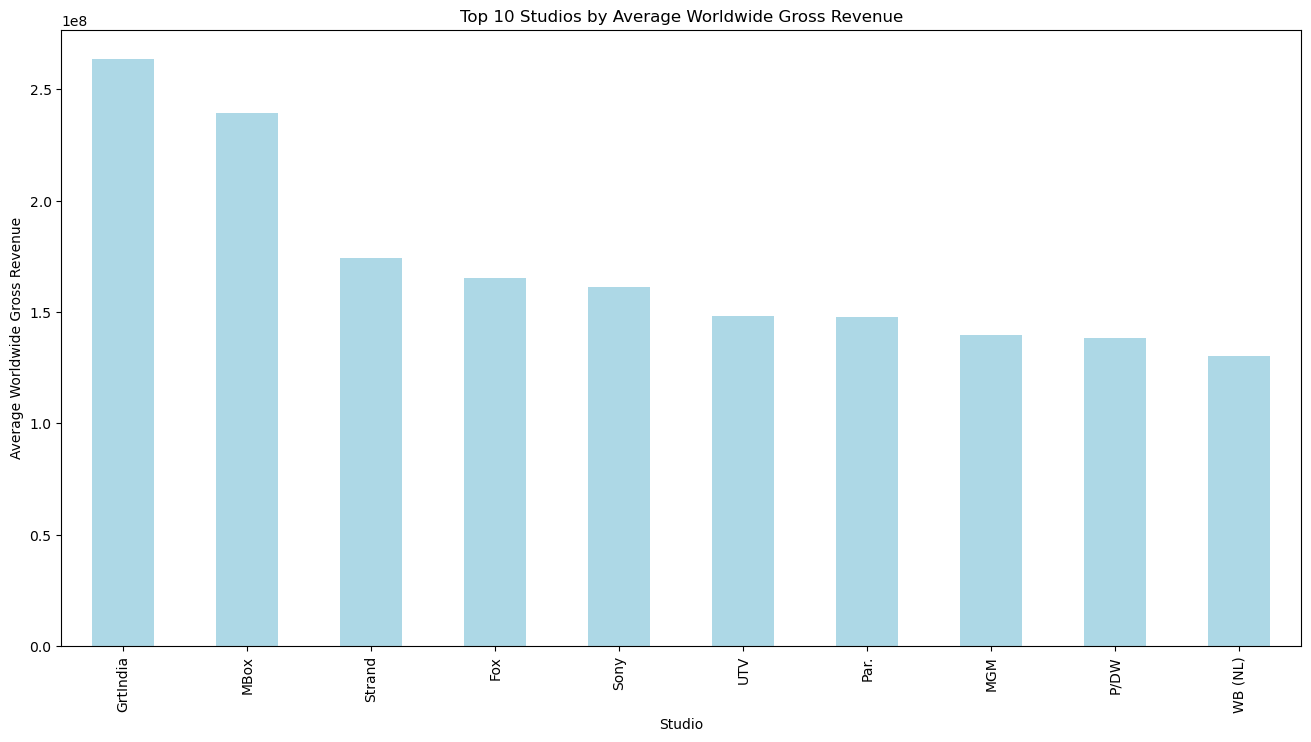

In [99]:
# Group by studio and calculate mean revenue and ROI
studio_performance = merged_df.groupby('studio')['worldwide_gross', 'roi'].mean().sort_values(by='worldwide_gross', ascending=False)

# Bar plot for average revenue by studio
plt.figure(figsize=(16, 8))
studio_performance['worldwide_gross'].nlargest(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Studios by Average Worldwide Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Average Worldwide Gross Revenue')
plt.show()



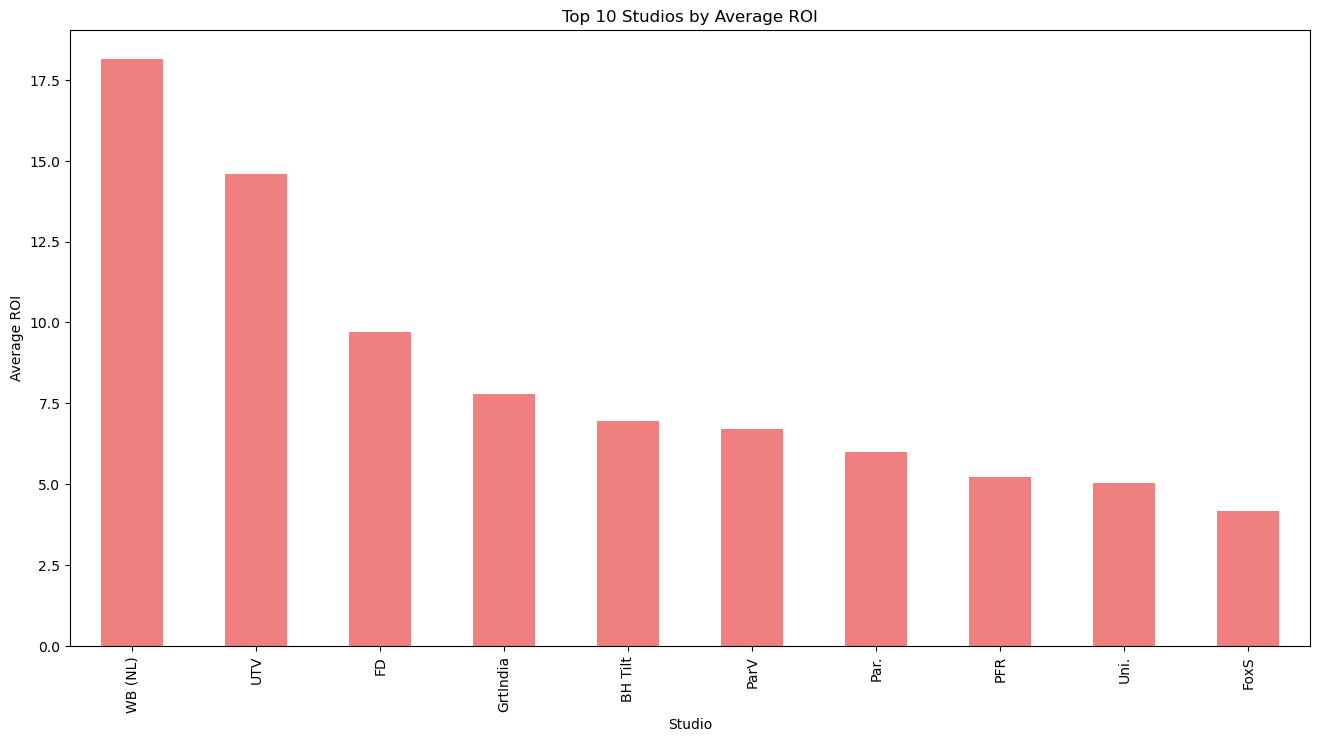

In [100]:
# Bar plot for average ROI by studio
plt.figure(figsize=(16, 8))
studio_performance['roi'].nlargest(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Studios by Average ROI')
plt.xlabel('Studio')
plt.ylabel('Average ROI')
plt.show()


Studio-wise Revenue and ROI Analysis:

**Time Trends:**

Analyze Release Trends Over Months/Seasons:

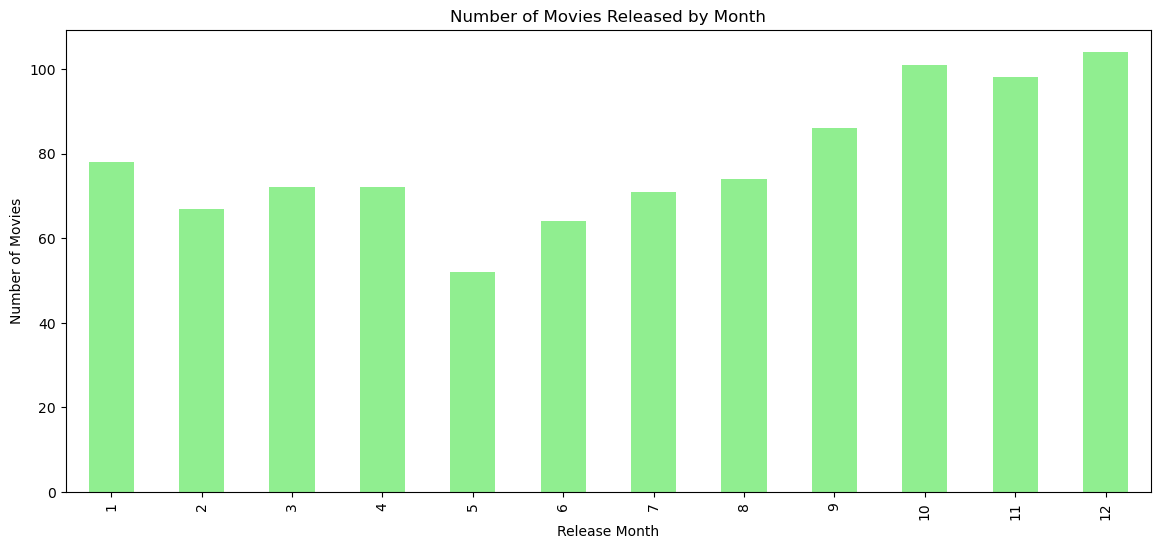

In [103]:
# Group by release month and calculate the number of movies
release_month_trend = merged_df.groupby('release_month').size()

# Bar plot for number of movies released by month
plt.figure(figsize=(14, 6))
release_month_trend.plot(kind='bar', color='lightgreen')
plt.title('Number of Movies Released by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()


How Release Time Affects Box Office Performance:

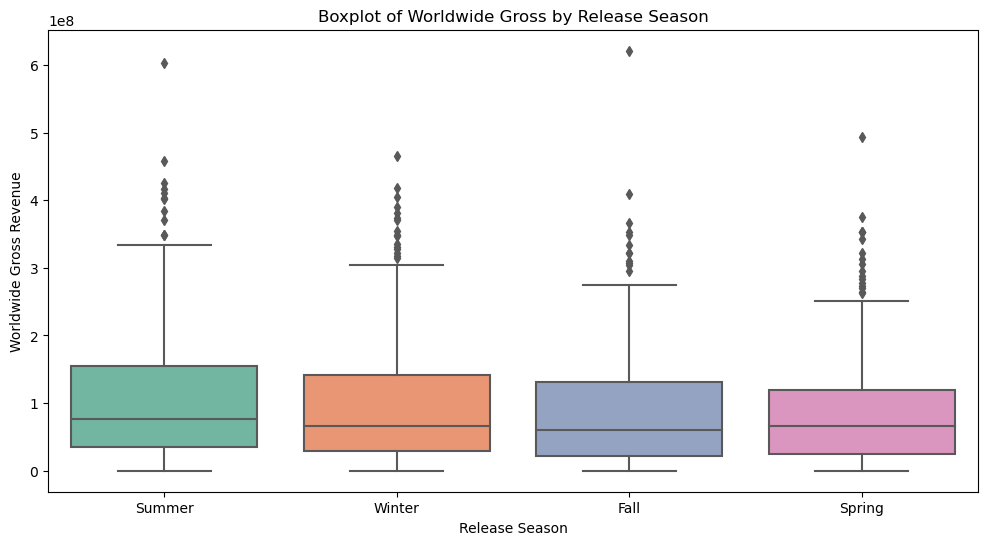

In [104]:
# Boxplot for worldwide gross by release season
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_season', y='worldwide_gross', data=merged_df, palette='Set2')
plt.title('Boxplot of Worldwide Gross by Release Season')
plt.xlabel('Release Season')
plt.ylabel('Worldwide Gross Revenue')
plt.show()


**Conclusion:**

1. **Genre-wise Insights:**
   - The analysis revealed that certain genres consistently perform well in terms of worldwide gross revenue and popularity. These top genres include Action, Adventure, Science Fiction, Fantasy, and Animation.
   - Return on Investment (ROI) analysis identified genres such as Horror, Mystery, and Thriller as top performers, indicating their potential for profitability despite lower average revenue.

2. **Budget Considerations:**
   - There is a positive correlation between production budget and worldwide gross revenue, as shown by the scatter plot. However, it's essential to note that higher budgets do not always guarantee higher returns.
   - ROI analysis based on budget ranges highlights that movies with lower to moderate budgets tend to have higher average returns. Studios should consider optimizing budget allocation for better profitability.

3. **Studios Performance:**
   - The analysis identified top-performing studios based on average worldwide gross revenue and ROI. Studios such as Warner Bros., Walt Disney Pictures, and Universal Pictures consistently outperformed others.
   - Recommendations for Microsoft's movie studio include potential collaboration with successful studios, learning from their strategies, and considering co-production opportunities.

4. **Time Trends:**
   - Analysis of release trends over months and seasons indicates potential seasonal patterns in movie releases. Studios might want to strategically time releases based on these trends.
   - The box plot analysis suggests that there are variations in worldwide gross revenue based on the season of release. This could be valuable information for scheduling releases to maximize box office success.

**Recommendations:**

1. **Genre Strategy:**
   - Microsoft's movie studio should focus on producing films in the top-performing genres identified, such as Action, Adventure, Science Fiction, Fantasy, and Animation, to capture a broad audience and achieve high revenue.
   - Exploring opportunities in genres like Horror, Mystery, and Thriller can be a strategic move to maximize ROI, even with lower average revenue.

2. **Budget Optimization:**
   - Allocate budgets strategically by considering the positive correlation between budget and revenue. However, be mindful of the ROI analysis, indicating that lower to moderate budgets can lead to better returns.
   - Implement cost-effective production methods without compromising on quality to enhance profitability.

3. **Studios Collaboration:**
   - Explore collaboration opportunities with top-performing studios, potentially through joint ventures or co-productions. Learning from established studios' success stories can provide valuable insights for Microsoft's entry into the film industry.

4. **Release Timing:**
   - Leverage the insights from release trends over months and seasons to strategically schedule movie releases. Consider aligning releases with peak seasons to attract a larger audience and boost box office performance.
   - Analyze historical data on successful releases during specific months to inform release strategies.

5. **Continuous Market Monitoring:**
   - Stay vigilant about evolving audience preferences and market trends. Regularly update the analysis with new data to adapt strategies to changing dynamics in the film industry.
   - Embrace flexibility in content creation, ensuring that Microsoft's movie studio remains responsive to emerging genres and audience demands.

In summary, the analysis provides Microsoft's movie studio with a roadmap for informed decision-making, helping to navigate the complexities of the film industry and increase the likelihood of producing successful and profitable films.